C:\Users\ahmedramadan\Miniconda3\lib\site-packages\pandas\util\_decorators.py:178: FutureWarning: the 'skip_footer' keyword is deprecated, use 'skipfooter' instead
  return func(*args, **kwargs)
C:\Users\ahmedramadan\Miniconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


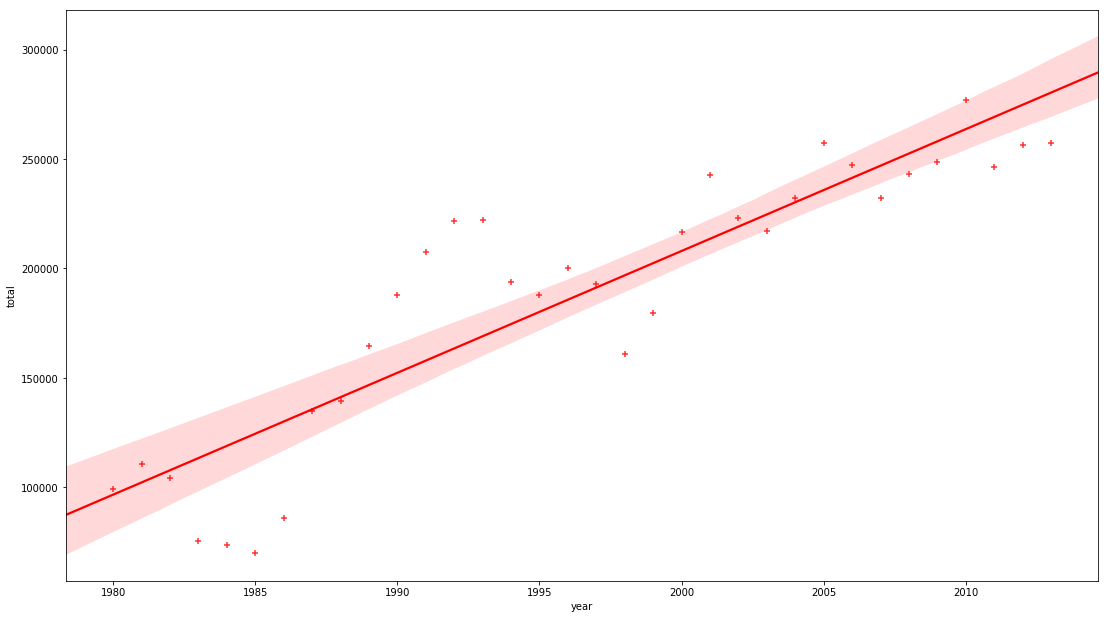

In [14]:
#import libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as  np   #  scientfic computing (ndarray library) 
import pandas as pd   #  data structure tool using to mainpulate and anysis dataset


#read dataset from excel sheet
df_can = pd.read_excel('./../week1/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skip_footer=2)

#preprocessing data

# in pandas axis=0 represents rows (default) and axis=1 represents columns.

df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
 
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
 
df_can.columns = list(map(str, df_can.columns))
 
df_can.set_index('Country', inplace=True)   
 
df_can['Total'] = df_can.sum(axis=1) # add new column to sum number of immigraints for each counry


years = list( map ( str , range(1980,2014) ) ) 






# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df_can[years].sum(axis=0))
 
# change the years to type float (useful for regression later on)
df_tot.index = map(float,df_tot.index)
 
# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace = True)
 
# rename columns
df_tot.columns = ['year', 'total']
 
import seaborn as sns
sns_plot = sns.regplot(x='year', y='total',color='red' , marker='+'  ,   data=df_tot)

fig = sns_plot.get_figure()
fig.set_size_inches(18.5, 10.5)
fig.savefig("regplot.png")